In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Ecommerce Customers')

In [6]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [14]:
df.drop(['Address','Avatar','Email'], axis = 1, inplace = True)

In [16]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [17]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


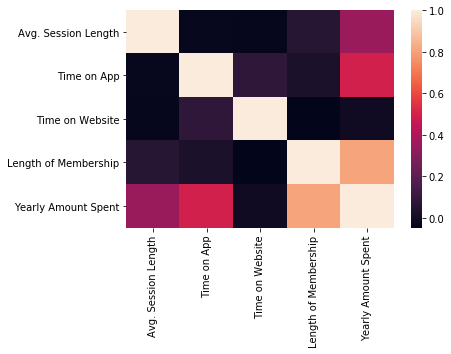

In [18]:
sns.heatmap(df.corr())

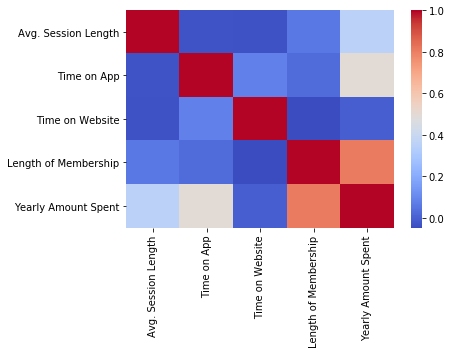

In [19]:
sns.heatmap(df.corr(), cmap = 'coolwarm')

In [20]:
# In the above plot we do see that Time on Website and Time on App has 0.08 correlation. That means they are more correlated. We will drop one of them. Since Time on Website has less correlation with Price column, we will drop it. Other x columns are having 0 correlation with each other so they are in dark blue color. 


df.drop('Time on Website', axis = 1, inplace =True)

In [21]:
df.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092


In [22]:
df.mean()

Avg. Session Length      33.053194
Time on App              12.052488
Length of Membership      3.533462
Yearly Amount Spent     499.314038
dtype: float64

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()

In [25]:
scaled_array = ss.fit_transform(df.drop('Yearly Amount Spent', axis =1))

In [26]:
scaled_array.shape 

(500, 3)

In [27]:
X = pd.DataFrame(data = scaled_array, columns = df.columns[:-1])

In [28]:
X.head()

,Avg. Session Length,Time on App,Length of Membership
0,1.456351,0.607280,0.550107
1,-1.136502,-0.949464,-0.870927
2,-0.052723,-0.727139,0.572067
3,1.263010,1.676390,-0.413996
4,0.279838,0.747770,0.914422


In [29]:
y = df['Yearly Amount Spent']

In [30]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [31]:
X.mean()

Avg. Session Length     2.832401e-15
Time on App            -1.105893e-15
Length of Membership    2.760014e-16
dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3)

In [35]:
X_train.shape

(350, 3)

In [37]:
X_test.shape

(150, 3)

In [36]:
y_train.shape

(350,)

In [38]:
y_test.shape

(150,)